# 统计对接后小分子的信息

In [1]:
import os
import pandas as pd
from collections import defaultdict
import numpy as np
import copy
from tqdm import tqdm
from utils import ligand_pocket_position_statistics, ZincPdbqt, generate_coor, get_pocket_info, map_and_conjunction, zinc_pdbqt_transform_decorator, gz_writer
from functools import partial

# Function define

In [2]:

@zinc_pdbqt_transform_decorator
def transform(pdbqt_model):
    return generate_coor(pdbqt_model)


@zinc_pdbqt_transform_decorator
def transform2(atom_list, pocket_alpha: list):
    return ligand_pocket_position_statistics(pocket_alpha, atom_list)


def main(dock_out_folder, fpocket_out_folder, pocket_index):
    # 提取pocket的信息
    pocket_dict = get_pocket_info(fpocket_out_folder)
    # 提取对接输出目录
    dock_conformation_sm = [os.path.join(dock_out_folder, file_name) for file_name in os.listdir(dock_out_folder) if file_name.endswith('.gz')]

    # 以每个分子中所有原子与最近的alpha球距离的平均值作为分子与口袋的距离
    statis_results = []
    for file in tqdm(dock_conformation_sm):
        statis_results.append(ZincPdbqt(file, transform=[transform, partial(transform2, pocket_alpha=pocket_dict[pocket_index])]))
    # results 的长度是分子的个数
    return map_and_conjunction(list, statis_results)


# main Function

In [3]:
if __name__ == "__main__":
    # IO file
    dock_out_folder = r'/mnt/e/Python_Project/SMTarRNA/project/data/3a6p/100k/'
    fpocket_out_folder = r'/mnt/e/Research/SM_miRNA/Data/Dock/complex/fpocket_results/3a6p_out/pockets'
    pocket = [('3a6p', 5),
              ('4z4c', 1),
              ('4z4d', 7),
              ('5zal', 7),
              ('5zam', 5),
              ('6cbd', 44),
              ('6lxd', 90),
              ('6v5b', 19)]
    results = main(dock_out_folder, fpocket_out_folder, 5)
    # pocket_sm = dict()
    # for key, distance in min_distance_dict.items():
    #     x = list()
    #     for molecular in distance:
    #         # m个原子的最近距离的平均值
    #         # print(np.mean(distance))
    #         x.append(np.mean(molecular))
    #     pocket_sm[key] = np.where(np.array(x) < 1)[0].tolist()
    # pocket_set = [set(pocket_sm[i+1]) for i in range(8)]
    # total_set = set()
    # for i in pocket_set:
    #     total_set = total_set | i
    


100%|██████████| 10/10 [01:20<00:00,  8.02s/it]


In [4]:
len(results)

100446

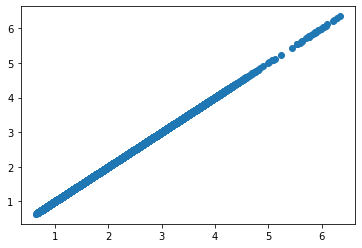

In [5]:
import matplotlib.pyplot as plt
import matplotlib
# matplotlib.use('')
fig, ax = plt.subplots()
distance = [i[1] for i in results]
data = dict(x=distance)
ax.scatter('x', 'x', data=data)
fig.savefig('test.png')

(array([4.1060e+03, 2.4322e+04, 2.3661e+04, 1.2361e+04, 7.7670e+03,
        6.7390e+03, 6.7090e+03, 5.8520e+03, 4.2330e+03, 2.5410e+03,
        1.2670e+03, 5.7500e+02, 1.9900e+02, 5.8000e+01, 1.6000e+01,
        6.0000e+00, 2.0000e+00, 1.3000e+01, 1.3000e+01, 6.0000e+00]),
 array([0.63744417, 0.9230168 , 1.20858944, 1.49416207, 1.7797347 ,
        2.06530734, 2.35087997, 2.63645261, 2.92202524, 3.20759788,
        3.49317051, 3.77874314, 4.06431578, 4.34988841, 4.63546105,
        4.92103368, 5.20660632, 5.49217895, 5.77775158, 6.06332422,
        6.34889685]),
 <BarContainer object of 20 artists>)

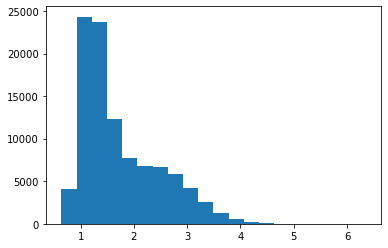

In [6]:
fig, ax = plt.subplots()
distance = [i[1] for i in results]
# data = dict(x=distance)
ax.hist(distance, bins=20)
# fig.savefig('test.png')

In [11]:
a = np.array(distance)
r_position = np.where(a<1)
# r_position

In [12]:
# dock_out_folder = r'/mnt/e/Python_Project/SMTarRNA/project/data/3a6p/10k/'
# 提取对接输出目录
dock_conformation_sm = [os.path.join(dock_out_folder, file_name) for file_name in os.listdir(dock_out_folder) if file_name.endswith('.gz')]

# 以每个分子中所有原子与最近的alpha球距离的平均值作为分子与口袋的距离
statis_results = []
for file in tqdm(dock_conformation_sm):
    statis_results.append(ZincPdbqt(file))
total_molecular = map_and_conjunction(list, statis_results)
# ecn = gz_writer('right_10k.pdbqt')

100%|██████████| 10/10 [00:00<00:00, 28.96it/s]


In [ ]:
ecn = open('right_10k_small_pocket.pdbqt', 'w')
for i in r_position[0]:
    molecular = total_molecular[i][1]
    ecn.writelines('MODEL \n' + molecular + 'ENDMDL\n')
ecn.close()

In [13]:
with open('random_sample.pdbqt', 'w') as f:
    for i in range(66):
        f.writelines('MODEL \n' + total_molecular[i][1] + 'ENDMDL\n')


In [16]:
molecular

('ZINC000861619001',
 'REMARK VINA RESULT:    -6.069      0.000      0.000\nREMARK INTER + INTRA:          -8.898\nREMARK INTER:                  -8.327\nREMARK INTRA:                  -0.570\nREMARK UNBOUND:                -0.700\nREMARK  Name = ZINC000861619001\nREMARK                            x       y       z     vdW  Elec       q    Type\nREMARK                         _______ _______ _______ _____ _____    ______ ____\nROOT\nATOM      1  N   LIG    1       15.698  58.994  25.904  0.00  0.00    -0.740 N \nATOM      2  H   LIG    1       15.137  58.204  25.869  0.00  0.00    +0.400 HD\nATOM      3  C   LIG    1       16.451  59.334  24.839  0.00  0.00    +0.710 C \nATOM      4  N   LIG    1       16.500  58.524  23.763  0.00  0.00    -0.630 N \nATOM      5  C   LIG    1       15.664  57.317  23.687  0.00  0.00    +0.220 C \nATOM      6  C   LIG    1       14.912  57.328  22.353  0.00  0.00    +0.210 C \nATOM      7  N   LIG    1       15.874  57.487  21.254  0.00  0.00    -0.680 

In [44]:
pocket_set = [set(pocket_sm[i+1]) for i in range(8)]
total_set = set()
for i in pocket_set:
    total_set = total_set | i


In [13]:
a = np.array([[1, 2, 3], [2, 3, 4]])
b = np.array([[3, 4, 5], [4, 5, 6]])
a = a[:, :,np.newaxis]
b = b.T[np.newaxis, :]
b.shape

(1, 3, 2)

In [27]:
import builtins
dir(builtins)
all()

['ArithmeticError',
 'AssertionError',
 'AttributeError',
 'BaseException',
 'BlockingIOError',
 'BrokenPipeError',
 'BufferError',
 'BytesWarning',
 'ChildProcessError',
 'ConnectionAbortedError',
 'ConnectionError',
 'ConnectionRefusedError',
 'ConnectionResetError',
 'DeprecationWarning',
 'EOFError',
 'Ellipsis',
 'EnvironmentError',
 'Exception',
 'False',
 'FileExistsError',
 'FileNotFoundError',
 'FloatingPointError',
 'FutureWarning',
 'GeneratorExit',
 'IOError',
 'ImportError',
 'ImportWarning',
 'IndentationError',
 'IndexError',
 'InterruptedError',
 'IsADirectoryError',
 'KeyError',
 'KeyboardInterrupt',
 'LookupError',
 'MemoryError',
 'ModuleNotFoundError',
 'NameError',
 'None',
 'NotADirectoryError',
 'NotImplemented',
 'NotImplementedError',
 'OSError',
 'OverflowError',
 'PendingDeprecationWarning',
 'PermissionError',
 'ProcessLookupError',
 'RecursionError',
 'ReferenceError',
 'ResourceWarning',
 'RuntimeError',
 'RuntimeWarning',
 'StopAsyncIteration',
 'StopIter

In [3]:
file = '/mnt/e/Python_Project/SMTarRNA/project/data/3a6p/100k/zinc_drug_like_3d_100k_rand_3a6p_dOthers_aH_dock_results_0-10044.pdbqt.gz'

data = ZincPdbqt(file, transform=[transform])

In [4]:
moleculars = [i for i in data]

In [5]:
atom_position = []
for i in moleculars:
    for t in i[1]:
        atom_position.append(t[1:])


(array([ 150.,  450.,  526.,  940., 1030.,  920., 1124., 1108.,  936.,
         826.,  652.,  486.,  346.,  224.,  136.,   76.,   40.,   16.,
          12.,    2.]),
 array([ 0.        ,  0.79607674,  1.59215348,  2.38823021,  3.18430695,
         3.98038369,  4.77646043,  5.57253716,  6.3686139 ,  7.16469064,
         7.96076738,  8.75684412,  9.55292085, 10.34899759, 11.14507433,
        11.94115107, 12.73722781, 13.53330454, 14.32938128, 15.12545802,
        15.92153476]),
 <BarContainer object of 20 artists>)

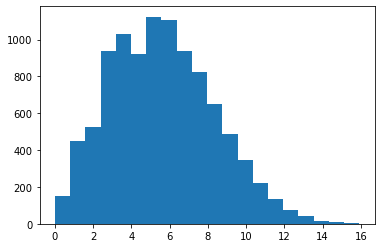

In [6]:
from scipy import spatial
import matplotlib.pyplot as plt
results = spatial.distance_matrix(atom_position[:100], atom_position[:100])
fig, ax = plt.subplots()
# data = dict(x=distance)
ax.hist(results.reshape(-1, 1), bins=20)